<a href="https://colab.research.google.com/github/Akshay-1024/Password-Generator-Python/blob/main/PasswordStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [184]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [185]:
data = pd.read_csv('/content/gdrive/MyDrive/ML Proj/data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


Data set added above


In [186]:
data['strength'].unique()


array([1, 2, 0])

In [187]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [188]:
data.dropna(inplace = True)
data.isna().sum()

password    0
strength    0
dtype: int64

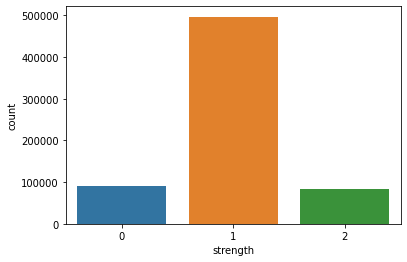

In [189]:
sns.countplot(data['strength'])

In [190]:
 password_tuple = np.array(data)
 password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [191]:
import random
random.shuffle(password_tuple)

password_tuple

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['visi7k1yr', 1],
       ...,
       ['1diospo', 0],
       ['jafexu516', 1],
       ['ak4ever', 0]], dtype=object)

In [192]:
 x = [labels[0] for labels in password_tuple]
 y = [labels[1] for labels in password_tuple]

 

In [193]:
def word_divide_char(inputs):
  character = []
  for i in inputs:
    character.append(i)
  return character

In [194]:
word_divide_char('akshay')

['a', 'k', 's', 'h', 'a', 'y']

In [195]:
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)

In [196]:
X = vectorizer.fit_transform(x)

In [197]:
X.shape

(669639, 128)

In [198]:
vectorizer.get_feature_names()

['\x05',
 '\x08',
 '\x0f',
 '\x10',
 '\x11',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¦',
 '§',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '‚']

In [199]:
vec = X[0]
vec

<1x128 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [200]:
vec.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56616352],
        [0.        ],
        [0.59213846],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [201]:
df = pd.DataFrame(vec.T.todense(),index = vectorizer.get_feature_names(),columns = ['TF-IDF'])
df.sort_values(by = ['TF-IDF'],ascending=False)

,TF-IDF
7,0.592138
5,0.566164
z,0.336004
k,0.291752
d,0.285941
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [203]:
X_train.shape

(535711, 128)

In [204]:
clf = LogisticRegression(random_state=0,multi_class='multinomial')

In [205]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [207]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 5362 12689    17]
 [ 3868 92903  2491]
 [   49  5192 11357]]


0.8185144256615495

In [208]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     18068
           1       0.84      0.94      0.88     99262
           2       0.82      0.68      0.75     16598

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [209]:
def pre(d):
  if d == 0:
    return 'Easy Password'
  if d == 1:
    return 'Medium Password'
  if d == 2:
    return 'Hard Password'

In [214]:
print("Enter Password You want to Determine the strength: ")
lis = []
ip = input()
lis.append(ip)
pred = vectorizer.transform(lis)
d = pre(clf.predict(pred))
d

Enter Password You want to Determine the strength: 
akhil


'Easy Password'